In [ ]:
#QUESTION A1
import math
def weighted_sum_calculation(inputs, weights):
    #Calculates the weighted sum of inputs as output=x1*w1+x2*w2+x3*w3.....+xi*wi
    return sum(x * w for x, w in zip(inputs, weights))

def step_function(weighted_sum):
    threshold=0
    #Step activation function, 1 if greater than or equal to zero else 0
    if weighted_sum >= threshold:
       return 1
    else:
      return 0

def bipolar_step_function(weighted_sum):
    threshold=0
    #Bipolar step activation function, returns 1 if weighted sum is greater than or equal to thresold else -1
    if weighted_sum >= threshold:
      return 1
    else:
      return -1

def sigmoid_function(weighted_sum):
    #Sigmoid activation function, returns 1/(1+e^-weightes sum)
    return 1 / (1 + math.exp(-weighted_sum))

def tanh_function(weighted_sum):
    #TanH activation function, returns tanh(x)=(e^x-e^-x)/(e^x+e^-x)
    return math.tanh(weighted_sum)

def relu_function(weighted_sum):
    #ReLU activation function, returns weighted sum if weighted sum is > 0 else 0
    return max(0, weighted_sum)

def leaky_relu_function(weighted_sum):
    alpha=0.01
    #Leaky ReLU activation function, returns weighted sum if weighted sum is > 0 else aplha*weight sum
    if weighted_sum > 0 :
       return weighted_sum
    else:
       return alpha * weighted_sum
def error_calculation(predicted, actual):
    #Calculates the error between predicted and actual values
    return actual - predicted

def update_weights(weights, inputs, learning_rate, error):
    # Updates weights based on the error and learning rate
    return [w + learning_rate * error * x for w, x in zip(weights, inputs)]

def update_bias(bias, learning_rate, error):
    # Updates the bias term
    return bias + learning_rate * error

def main():
    #initial weights
    weights = [0.73, 0.5]
    # Bias to achieve AND gate behavior
    bias = -0.7
    # AND gate (list of tuples)
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    #outputs for AND gate
    actual_outputs = [0, 0, 0, 1]
    #learning rate
    learning_rate = 0.1

    for idx, (input1, input2) in enumerate(inputs):
        input_values = [input1, input2]
        # weighted sum
        weighted_sum=weighted_sum_calculation(input_values, weights) + bias
        print(f"Inputs: {input_values}, Weighted Sum: {weighted_sum}")

        # Activation Function results output
        step_output = step_function(weighted_sum)
        print(f"Step Function Output: {step_output}")

        # Bipolar step activation function results output
        bipolar_step_output = bipolar_step_function(weighted_sum)
        print(f"Bipolar Step Function Output: {bipolar_step_output}")

        #Sigmoid activation function results output
        sigmoid_output = sigmoid_function(weighted_sum)
        print(f"Sigmoid Function Output: {sigmoid_output}")

        #TanH activation function results output
        tanh_output = tanh_function(weighted_sum)
        print(f"TanH Function Output: {tanh_output}")

        #ReLU activation function results output
        relu_output = relu_function(weighted_sum)
        print(f"ReLU Function Output: {relu_output}")

        #Leaky ReLU activation function results output
        leaky_relu_output = leaky_relu_function(weighted_sum)
        print(f"Leaky ReLU Function Output: {leaky_relu_output}\n")


    actual_output = 0
    #max epochs
    max_epochs = 1000
    for epoch in range(max_epochs):
        print(f"Epoch {epoch + 1}")
        total_error = 0

        #training the preceptron
        for idx, (input1, input2) in enumerate(inputs):
            input_values = [input1, input2]
            #weighted sum
            weighted_sum = weighted_sum_calculation(input_values, weights) + bias
            #predicted output
            step_output = step_function(weighted_sum)
            actual_output = actual_outputs[idx]
            error = error_calculation(step_output, actual_output)
            total_error += abs(error)
            #updating weights and bias
            weights = update_weights(weights, input_values, learning_rate, error)
            bias = update_bias(bias, learning_rate, error)
            #printing
            print(f"Inputs: {input_values}, Weighted Sum: {weighted_sum}")
            print(f"Step Function Output: {step_output}, Actual Output: {actual_output}, Error: {error}")
            print(f"Updated Weights: {weights}, Updated Bias: {bias}\n")

        # Convergence check
        if total_error == 0:
            print("Training converged!")
            break

if __name__ == "__main__":
    main()



Inputs: [0, 0], Weighted Sum: -0.7
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.3318122278318339
TanH Function Output: -0.6043677771171636
ReLU Function Output: 0
Leaky ReLU Function Output: -0.006999999999999999

Inputs: [0, 1], Weighted Sum: -0.19999999999999996
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.45016600268752216
TanH Function Output: -0.19737532022490398
ReLU Function Output: 0
Leaky ReLU Function Output: -0.0019999999999999996

Inputs: [1, 0], Weighted Sum: 0.030000000000000027
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.5074994375506203
TanH Function Output: 0.029991003238820174
ReLU Function Output: 0.030000000000000027
Leaky ReLU Function Output: 0.030000000000000027

Inputs: [1, 1], Weighted Sum: 0.53
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.6294831119673949
TanH Function Output: 0.4853810906053715
ReLU Functio

Converged after 76 epochs
FINAL WEIGHTS: [4.75 0.15 0.05]
FINAL BIAS: -4.899999999999991
No. of EPOCHS TO CONVERGE: 76


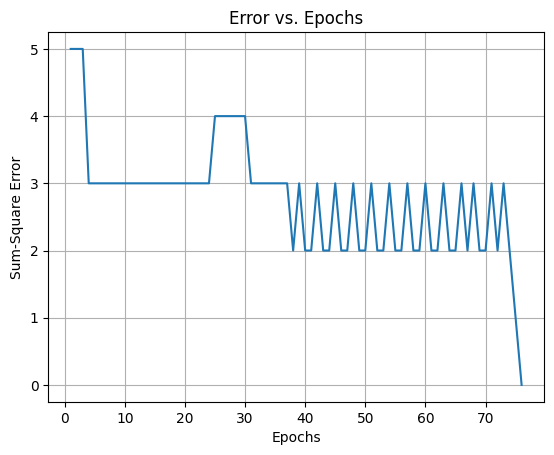

In [ ]:
#QUESTION A2
import numpy as np
import matplotlib.pyplot as plt

def weighted_sum_calculation(inputs, weights):
    #Calculates the weighted sum of inputs as output=x1*w1+x2*w2+x3*w3.....+xi*wi
    return sum(x * w for x, w in zip(inputs, weights))

def step_function(weighted_sum):
    threshold=0
    #Step activation function, 1 if greater than or equal to zero else 0
    if weighted_sum >= threshold:
       return 1
    else:
      return 0

# Function to calculate the error
def calculate_error(predicted_output, actual_output):
    return actual_output - predicted_output

# Training function for the perceptron model
def train_perceptron(inputs, outputs, weights, bias, learning_rate, max_iterations, convergence_threshold):
    errors = []

    for epoch in range(max_iterations):
        total_error = 0
        for input_vector, actual_output in zip(inputs, outputs):
            weighted_sum = weighted_sum_calculation(input_vector, weights)+bias
            predicted_output = step_function(weighted_sum)
            error = calculate_error(predicted_output, actual_output)
            total_error += error**2

            # Update weights and bias
            for i in range(len(weights)):
                weights[i] += learning_rate * error * input_vector[i]
            bias += learning_rate * error

        errors.append(total_error)

        # Check for convergence
        if total_error <= convergence_threshold:
            print(f"Converged after {epoch + 1} epochs")
            return weights, bias, epoch + 1, errors

    print(f"Did not converge within {max_iterations} iterations")
    return weights, bias, max_iterations, errors

# Function to plot the sum of squared errors over epochs
def plot(errors):
    plt.plot(range(1, len(errors) + 1), errors)
    plt.title('Error vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid(True)
    plt.show()

def main():
    # Initial weights and bias
    weights = np.array([10,0.2, -0.75])
    bias = 0.65
    # Learning rate
    alpha = 0.05
    # Threshold for convergence
    convergence_threshold = 0.002
    # Maximum number of iterations
    max_iterations = 1000
    # AND gate input-output pairs with three inputs (including a bias term)
    inputs = [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
    #  AND gate output for three inputs
    outputs = [0, 0, 0, 0, 0, 0, 0, 1]

    # Training the perceptron
    final_weights, final_bias, num_epochs, errors = train_perceptron(inputs, outputs, weights, bias, alpha, max_iterations, convergence_threshold)

    # Printing the final weights, bias, and number of epochs
    print(f"FINAL WEIGHTS: {final_weights}")
    print(f"FINAL BIAS: {final_bias}")
    print(f"No. of EPOCHS TO CONVERGE: {num_epochs}")

    # Plotting the error vs epochs
    plot(errors)
if __name__ == "__main__":
    main()

In [ ]:
#QUESTION A3
import math
import random

def weighted_sum_calculation(inputs, weights):
    #Calculates the weighted sum of inputs as output=x1*w1+x2*w2+x3*w3.....+xi*wi
    return sum(x * w for x, w in zip(inputs, weights))

# Bipolar step activation function, returns 1 if the weighted sum is greater than or equal to the threshold, else -1
def bipolar_step_function(weighted_sum, threshold=0):
    if weighted_sum >= threshold:
      return 1
    else:
      return -1

# Sigmoid activation function, returns a value between 0 and 1 based on the sigmoid function
def sigmoid_function(weighted_sum):
    return 1 / (1 + math.exp(-weighted_sum))

# ReLU activation function: Returns the weighted sum if it's positive, otherwise 0
def relu_function(weighted_sum):
    return max(0, weighted_sum)

# Calculating error by difference between the actual output and the predicted output
def error_calculation(predicted, actual):
    return actual - predicted

# Training function for the perceptron model
def train_perceptron(activation_function, learning_rate, max_epochs):
    # Initialized weights and bias
    weights = [0.75, 0.5]
    bias = 0.65
    #list of tuples of AND gate inputs
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    #Actual output for AND gate
    actual_outputs = [0,0,0,1]
     # Total number of iterations for all epochs
    total_iterations = 0
    # Iterate through the number of epochs
    for epoch in range(max_epochs):
        # Initialized total error for the current epoch
        total_error = 0
        # Number of iterations within the current epoch
        epoch_iterations = 0
        # Iterate through each input-output pair
        for idx, (input1, input2) in enumerate(inputs):
            input_values = [input1, input2]
            # Calculates the weighted sum including bias
            weighted_sum = weighted_sum_calculation(input_values, weights) + bias
            # Applied the activation function to the weighted sum to get the predicted output
            predicted_output = activation_function(weighted_sum)

            # Calculate the error as the difference between actual and predicted outputs
            error = error_calculation(predicted_output, actual_outputs[idx])
            total_error += abs(error)  # Accumulate the absolute error for this epoch

            # Update weights and bias based on the error and learning rate
            for i in range(len(weights)):
                weights[i] += learning_rate * error * input_values[i]
            bias += learning_rate * error

            epoch_iterations += 1  # Increments the iteration count for this epoch

        total_iterations += epoch_iterations  # Adds the epoch's iterations to the total

        # Checks if the perceptron has converged (no error)
        if total_error == 0:
            print(f"Converged after {epoch + 1} epochs and {total_iterations} iterations")
            return epoch + 1, total_iterations  # Returns the number of epochs and iterations if converged

    # If the loop finishes without convergence, prints a message and return the total counts
    print(f"Did not converge within {max_epochs} epochs and {total_iterations} iterations")
    return max_epochs, total_iterations


def main():
    #learning rate
    learning_rate = 0.1
    #maximum number of epochs
    max_epochs = 1000

    # Trains the perceptron with bipolar Step activation function
    print("Bipolar Step Function:")
    bipolar_epochs, bipolar_iterations = train_perceptron(bipolar_step_function, learning_rate, max_epochs)

    # Trains the perceptron with the sigmoid activation function
    print("\nSigmoid Function:")
    sigmoid_epochs, sigmoid_iterations = train_perceptron(sigmoid_function, learning_rate, max_epochs)

    # Trains the perceptron with the ReLU activation function
    print("\nReLU Function:")
    relu_epochs, relu_iterations = train_perceptron(relu_function, learning_rate, max_epochs)

    # Compares the results of all three activation functions
    print("\nComparison:")
    print(f"Bipolar Step Function: {bipolar_epochs} epochs, {bipolar_iterations} iterations")
    print(f"Sigmoid Function: {sigmoid_epochs} epochs, {sigmoid_iterations} iterations")
    print(f"ReLU Function: {relu_epochs} epochs, {relu_iterations} iterations")

if __name__ == "__main__":
    main()


Bipolar Step Function:
Did not converge within 1000 epochs and 4000 iterations

Sigmoid Function:
Did not converge within 1000 epochs and 4000 iterations

ReLU Function:
Did not converge within 1000 epochs and 4000 iterations

Comparison:
Bipolar Step Function: 1000 epochs, 4000 iterations
Sigmoid Function: 1000 epochs, 4000 iterations
ReLU Function: 1000 epochs, 4000 iterations


Learning rate: 0.1, Iterations to converge: 8,Epochs to converge: 2
Learning rate: 0.2, Iterations to converge: 8,Epochs to converge: 2
Learning rate: 0.3, Iterations to converge: 12,Epochs to converge: 3
Learning rate: 0.4, Iterations to converge: 12,Epochs to converge: 3
Learning rate: 0.5, Iterations to converge: 12,Epochs to converge: 3
Learning rate: 0.6, Iterations to converge: 24,Epochs to converge: 6
Learning rate: 0.7, Iterations to converge: 24,Epochs to converge: 6
Learning rate: 0.8, Iterations to converge: 24,Epochs to converge: 6
Learning rate: 0.9, Iterations to converge: 24,Epochs to converge: 6
Learning rate: 1.0, Iterations to converge: 24,Epochs to converge: 6


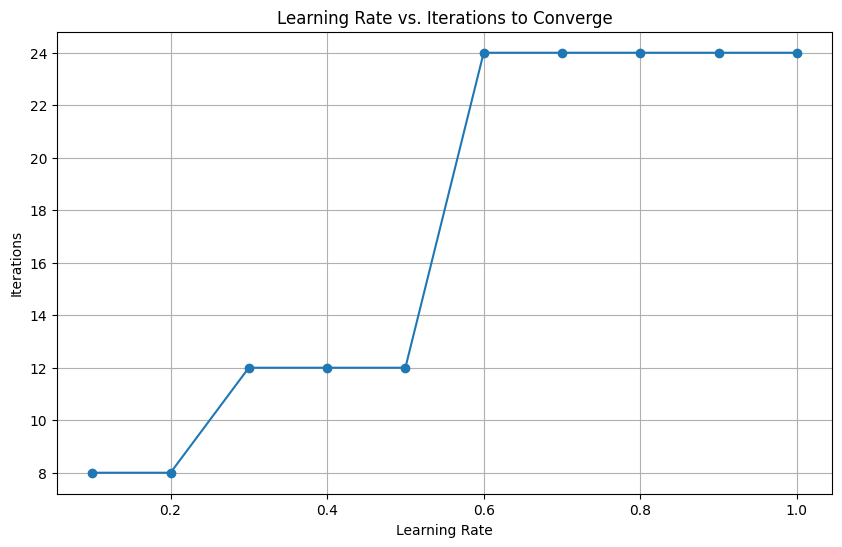

In [ ]:
###### A4 QUESTION
import math
import random
import matplotlib.pyplot as plt

# Summation unit calculates the weighted sum  inputs as output=x1*w1+x2*w2+x3*w3.....+xi*wi
def summation_unit(inputs, weights):
    return sum(x * w for x, w in zip(inputs, weights))

#Step activation function, 1 if greater than or equal to zero else 0
def step_function(weighted_sum, threshold=0):
    return 1 if weighted_sum >= threshold else 0

# Calculating error by difference between the actual output and the predicted output
def error_calculation(predicted, actual):
    return actual - predicted

# Training function for the perceptron model
def train_perceptron(learning_rate, max_epochs):
    weights = [0.73, 0.5]  # Initialzed weights as in A1
    bias = -0.7  # Initialzed bias
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    actual_outputs = [0, 0, 0, 1]  # AND gate
    total_iterations = 0
    #calculates no.of epochs and iterations
    for epoch in range(max_epochs):
        total_error = 0
        epoch_iterations = 0
        for idx, (input1, input2) in enumerate(inputs):
            input_values = [input1, input2]
            #weighted sum
            weighted_sum = summation_unit(input_values, weights) + bias
            #predicted value
            predicted_output = step_function(weighted_sum)
            error = error_calculation(predicted_output, actual_outputs[idx])
            total_error += abs(error)
            epoch_iterations += 1
            #updation of weighted sum and bias
            for i in range(len(weights)):
                weights[i] += learning_rate * error * input_values[i]
            bias += learning_rate * error

        total_iterations += epoch_iterations

        if total_error == 0:
            return epoch + 1, total_iterations  # returns both epochs and total iterations

    return max_epochs, total_iterations  # returns both epochs and total iterations even if max_epochs is reached

def main():
    # List of learning rates
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    max_epochs = 1000
    iterations = [] #Initializes iterations and epochs as lists
    epochs = []
    #calculates epoches for different learning rates
    for lr in learning_rates:
        num_epochs, num_iterations = train_perceptron(lr, max_epochs) # Changed variables names to avoid overwriting
        iterations.append(num_iterations)
        epochs.append(num_epochs)
        print(f"Learning rate: {lr}, Iterations to converge: {num_iterations},Epochs to converge: {num_epochs}") # Print num_epochs instead of epochs

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, iterations, marker='o')
    plt.title('Learning Rate vs. Iterations to Converge')
    #labeling
    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
#QUESTION A5-1
import math
def weighted_sum_calculation(inputs, weights):
    #Calculates the weighted sum of inputs as output=x1*w1+x2*w2+x3*w3.....+xi*wi
    return sum(x * w for x, w in zip(inputs, weights))

def step_function(weighted_sum):
    threshold=0
    #Step activation function, 1 if greater than or equal to zero else 0
    if weighted_sum >= threshold:
       return 1
    else:
      return 0

def bipolar_step_function(weighted_sum):
    threshold=0
    #Bipolar step activation function, returns 1 if weighted sum is greater than or equal to thresold else -1
    if weighted_sum >= threshold:
      return 1
    else:
      return -1

def sigmoid_function(weighted_sum):
    #Sigmoid activation function, returns 1/(1+e^-weightes sum)
    return 1 / (1 + math.exp(-weighted_sum))

def tanh_function(weighted_sum):
    #TanH activation function, returns tanh(x)=(e^x-e^-x)/(e^x+e^-x)
    return math.tanh(weighted_sum)

def relu_function(weighted_sum):
    #ReLU activation function, returns weighted sum if weighted sum is > 0 else 0
    return max(0, weighted_sum)

def leaky_relu_function(weighted_sum):
    alpha=0.01
    #Leaky ReLU activation function, returns weighted sum if weighted sum is > 0 else aplha*weight sum
    if weighted_sum > 0 :
       return weighted_sum
    else:
       return alpha * weighted_sum
def error_calculation(predicted, actual):
    #Calculates the error between predicted and actual values
    return actual - predicted

def update_weights(weights, inputs, learning_rate, error):
    # Updates weights based on the error and learning rate
    return [w + learning_rate * error * x for w, x in zip(weights, inputs)]

def update_bias(bias, learning_rate, error):
    # Updates the bias term
    return bias + learning_rate * error

def main():
    #initial weights
    weights = [0.73, 0.5]
    # Bias to achieve AND gate behavior
    bias = -0.7
    # AND gate (list of tuples)
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    #outputs for AND gate
    actual_outputs = [0, 1,1,0]
    #learning rate
    learning_rate = 0.1

    for idx, (input1, input2) in enumerate(inputs):
        input_values = [input1, input2]
        # weighted sum
        weighted_sum=weighted_sum_calculation(input_values, weights) + bias
        print(f"Inputs: {input_values}, Weighted Sum: {weighted_sum}")

        # Activation Function results output
        step_output = step_function(weighted_sum)
        print(f"Step Function Output: {step_output}")

        # Bipolar step activation function results output
        bipolar_step_output = bipolar_step_function(weighted_sum)
        print(f"Bipolar Step Function Output: {bipolar_step_output}")

        #Sigmoid activation function results output
        sigmoid_output = sigmoid_function(weighted_sum)
        print(f"Sigmoid Function Output: {sigmoid_output}")

        #TanH activation function results output
        tanh_output = tanh_function(weighted_sum)
        print(f"TanH Function Output: {tanh_output}")

        #ReLU activation function results output
        relu_output = relu_function(weighted_sum)
        print(f"ReLU Function Output: {relu_output}")

        #Leaky ReLU activation function results output
        leaky_relu_output = leaky_relu_function(weighted_sum)
        print(f"Leaky ReLU Function Output: {leaky_relu_output}\n")


    actual_output = 0
    #max epochs
    max_epochs = 1000
    for epoch in range(max_epochs):
        total_error = 0

        #training the preceptron
        for idx, (input1, input2) in enumerate(inputs):
            input_values = [input1, input2]
            #weighted sum
            weighted_sum = weighted_sum_calculation(input_values, weights) + bias
            #predicted output
            step_output = step_function(weighted_sum)
            actual_output = actual_outputs[idx]
            error = error_calculation(step_output, actual_output)
            total_error += abs(error)
            #updating weights and bias
            weights = update_weights(weights, input_values, learning_rate, error)
            bias = update_bias(bias, learning_rate, error)

        # Convergence check
        if total_error == 0:
            print("Training converged!")
            break
    # Print final weights and bias
    print("Final Weights:", weights)
    print("Final Bias:", bias)
if __name__ == "__main__":
    main()



Inputs: [0, 0], Weighted Sum: -0.7
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.3318122278318339
TanH Function Output: -0.6043677771171636
ReLU Function Output: 0
Leaky ReLU Function Output: -0.006999999999999999

Inputs: [0, 1], Weighted Sum: -0.19999999999999996
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.45016600268752216
TanH Function Output: -0.19737532022490398
ReLU Function Output: 0
Leaky ReLU Function Output: -0.0019999999999999996

Inputs: [1, 0], Weighted Sum: 0.030000000000000027
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.5074994375506203
TanH Function Output: 0.029991003238820174
ReLU Function Output: 0.030000000000000027
Leaky ReLU Function Output: 0.030000000000000027

Inputs: [1, 1], Weighted Sum: 0.53
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.6294831119673949
TanH Function Output: 0.4853810906053715
ReLU Functio

Did not converge within 1000 iterations
FINAL WEIGHTS: [-0.05 -0.05 -0.05]
FINAL BIAS: 0.10000000000000002
No. of EPOCHS TO CONVERGE: 1000


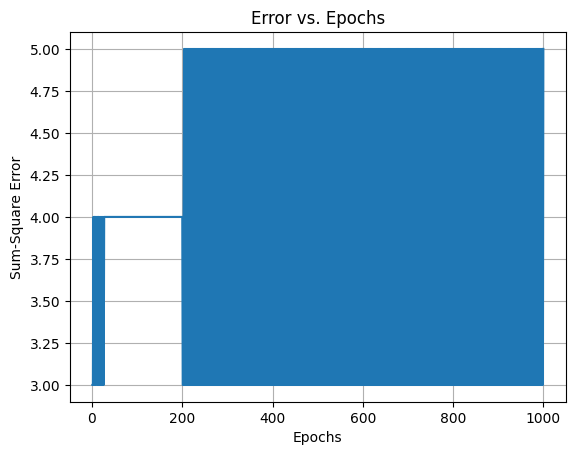

In [ ]:
#QUESTION A5-2
import numpy as np
import matplotlib.pyplot as plt

def weighted_sum_calculation(inputs, weights):
    #Calculates the weighted sum of inputs as output=x1*w1+x2*w2+x3*w3.....+xi*wi
    return sum(x * w for x, w in zip(inputs, weights))

def step_function(weighted_sum):
    threshold=0
    #Step activation function, 1 if greater than or equal to zero else 0
    if weighted_sum >= threshold:
       return 1
    else:
      return 0

# Function to calculate the error
def calculate_error(predicted_output, actual_output):
    return actual_output - predicted_output

# Training function for the perceptron model
def train_perceptron(inputs, outputs, weights, bias, learning_rate, max_iterations, convergence_threshold):
    errors = []

    for epoch in range(max_iterations):
        total_error = 0
        for input_vector, actual_output in zip(inputs, outputs):
            weighted_sum = weighted_sum_calculation(input_vector, weights)+bias
            predicted_output = step_function(weighted_sum)
            error = calculate_error(predicted_output, actual_output)
            total_error += error**2

            # Update weights and bias
            for i in range(len(weights)):
                weights[i] += learning_rate * error * input_vector[i]
            bias += learning_rate * error

        errors.append(total_error)

        # Check for convergence
        if total_error <= convergence_threshold:
            print(f"Converged after {epoch + 1} epochs")
            return weights, bias, epoch + 1, errors

    print(f"Did not converge within {max_iterations} iterations")
    return weights, bias, max_iterations, errors

# Function to plot the sum of squared errors over epochs
def plot(errors):
    plt.plot(range(1, len(errors) + 1), errors)
    plt.title('Error vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid(True)
    plt.show()

def main():
    # Initial weights and bias
    weights = np.array([10,0.2, -0.75])
    bias = 0.65
    # Learning rate
    alpha = 0.05
    # Threshold for convergence
    convergence_threshold = 0.002
    # Maximum number of iterations
    max_iterations = 1000
    # AND gate input-output pairs with three inputs (including a bias term)
    inputs = [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
    #  AND gate output for three inputs
    outputs = [0, 1, 1, 1, 1, 1, 1, 0]

    # Training the perceptron
    final_weights, final_bias, num_epochs, errors = train_perceptron(inputs, outputs, weights, bias, alpha, max_iterations, convergence_threshold)

    # Printing the final weights, bias, and number of epochs
    print(f"FINAL WEIGHTS: {final_weights}")
    print(f"FINAL BIAS: {final_bias}")
    print(f"No. of EPOCHS TO CONVERGE: {num_epochs}")

    # Plotting the error vs epochs
    plot(errors)
if __name__ == "__main__":
    main()

In [ ]:
#QUESTION A5-3
import math
import random

def weighted_sum_calculation(inputs, weights):
    #Calculates the weighted sum of inputs as output=x1*w1+x2*w2+x3*w3.....+xi*wi
    return sum(x * w for x, w in zip(inputs, weights))

# Bipolar step activation function, returns 1 if the weighted sum is greater than or equal to the threshold, else -1
def bipolar_step_function(weighted_sum, threshold=0):
    if weighted_sum >= threshold:
      return 1
    else:
      return -1

# Sigmoid activation function, returns a value between 0 and 1 based on the sigmoid function
def sigmoid_function(weighted_sum):
    return 1 / (1 + math.exp(-weighted_sum))

# ReLU activation function: Returns the weighted sum if it's positive, otherwise 0
def relu_function(weighted_sum):
    return max(0, weighted_sum)

# Calculating error by difference between the actual output and the predicted output
def error_calculation(predicted, actual):
    return actual - predicted

# Training function for the perceptron model
def train_perceptron(activation_function, learning_rate, max_epochs):
    # Initialized weights and bias
    weights = [0.75, 0.5]
    bias = 0.65
    #list of tuples of AND gate inputs
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    #Actual output for AND gate
    actual_outputs = [0,1,1,0]
     # Total number of iterations for all epochs
    total_iterations = 0
    # Iterate through the number of epochs
    for epoch in range(max_epochs):
        # Initialized total error for the current epoch
        total_error = 0
        # Number of iterations within the current epoch
        epoch_iterations = 0
        # Iterate through each input-output pair
        for idx, (input1, input2) in enumerate(inputs):
            input_values = [input1, input2]
            # Calculates the weighted sum including bias
            weighted_sum = weighted_sum_calculation(input_values, weights) + bias
            # Applied the activation function to the weighted sum to get the predicted output
            predicted_output = activation_function(weighted_sum)

            # Calculate the error as the difference between actual and predicted outputs
            error = error_calculation(predicted_output, actual_outputs[idx])
            total_error += abs(error)  # Accumulate the absolute error for this epoch

            # Update weights and bias based on the error and learning rate
            for i in range(len(weights)):
                weights[i] += learning_rate * error * input_values[i]
            bias += learning_rate * error

            epoch_iterations += 1  # Increments the iteration count for this epoch

        total_iterations += epoch_iterations  # Adds the epoch's iterations to the total

        # Checks if the perceptron has converged (no error)
        if total_error == 0:
            print(f"Converged after {epoch + 1} epochs and {total_iterations} iterations")
            return epoch + 1, total_iterations  # Returns the number of epochs and iterations if converged

    # If the loop finishes without convergence, prints a message and return the total counts
    print(f"Did not converge within {max_epochs} epochs and {total_iterations} iterations")
    return max_epochs, total_iterations


def main():
    #learning rate
    learning_rate = 0.1
    #maximum number of epochs
    max_epochs = 1000

    # Trains the perceptron with bipolar Step activation function
    print("Bipolar Step Function:")
    bipolar_epochs, bipolar_iterations = train_perceptron(bipolar_step_function, learning_rate, max_epochs)

    # Trains the perceptron with the sigmoid activation function
    print("\nSigmoid Function:")
    sigmoid_epochs, sigmoid_iterations = train_perceptron(sigmoid_function, learning_rate, max_epochs)

    # Trains the perceptron with the ReLU activation function
    print("\nReLU Function:")
    relu_epochs, relu_iterations = train_perceptron(relu_function, learning_rate, max_epochs)

    # Compares the results of all three activation functions
    print("\nComparison:")
    print(f"Bipolar Step Function: {bipolar_epochs} epochs, {bipolar_iterations} iterations")
    print(f"Sigmoid Function: {sigmoid_epochs} epochs, {sigmoid_iterations} iterations")
    print(f"ReLU Function: {relu_epochs} epochs, {relu_iterations} iterations")

if __name__ == "__main__":
    main()


Bipolar Step Function:
Did not converge within 1000 epochs and 4000 iterations

Sigmoid Function:
Did not converge within 1000 epochs and 4000 iterations

ReLU Function:
Did not converge within 1000 epochs and 4000 iterations

Comparison:
Bipolar Step Function: 1000 epochs, 4000 iterations
Sigmoid Function: 1000 epochs, 4000 iterations
ReLU Function: 1000 epochs, 4000 iterations


In [ ]:
#QUESTION A6
import numpy as np
import pandas as pd
from google.colab import drive

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction function
def predict(features):
    z = np.dot(features, weights) + bias
    return sigmoid(z)

def training(epochs, features, labels, bias, weights,learning_rate):
    # Training the perceptron
    for epoch in range(epochs):
        for i in range(len(features)):
            # Calculate weighted sum
            z = np.dot(features[i], weights) + bias
            # Apply sigmoid activation
            output = sigmoid(z)
            # Calculate error
            error = labels[i] - output
            # Update weights and bias
            weights += learning_rate * error * features[i]
            bias += learning_rate * error
    return weights, bias

def main():
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx'
    purchase_data = pd.read_excel(file_path, usecols=[1, 2, 3, 4,5])
    print("PURCHASE DATA:")
    print(purchase_data)
    #data
    data1 = purchase_data.to_numpy()
    #features
    features = data1[:, :-1]
    #labels
    labels = data1[:, -1]
    #weights
    weights = np.array([0.1, 0.2, -0.3, 0.4])
    #bias
    bias = 0.5
    #learnng rate
    learning_rate = 0.001
    #maximum epochs
    epochs = 1000

    # Training the perceptron
    weights, bias = training(epochs, features, labels, bias, weights,learning_rate)

    # Final weights and bias
    print("Weights:", weights)
    print("Bias:", bias)

    # Testing predictions
    for i in range(len(features)):
        prediction = predict(features[i])
        print(f"C_{i+1}: Predicted = {prediction:.2f}, Actual = {labels[i]}")

if __name__ == "__main__":
    main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PURCHASE DATA:
   Candies  Mangoes  Milk Packets  Payment  High Value
0       20        6             2      386           1
1       16        3             6      289           1
2       27        6             2      393           1
3       19        1             2      110           0
4       24        4             2      280           1
5       22        1             5      167           0
6       15        4             2      271           1
7       18        4             2      274           1
8       21        1             4      148           0
9       16        2             4      198           0
Weights: [-6.05422246  1.12821562 -2.78700389  0.5315664 ]
Bias: 0.011290999884740544
C_1: Predicted = 1.00, Actual = 1
C_2: Predicted = 0.99, Actual = 1
C_3: Predicted = 1.00, Actual = 1
C_4: Predicted = 0.00, Actual = 0
C_5: Predicted = 0.99, Actual

In [ ]:
#QUESTION A7
import numpy as np
import pandas as pd
from google.colab import drive

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction function
def predict(features):
    z = np.dot(features, weights) + bias
    return sigmoid(z)

def training(epochs, features, labels, bias, weights,learning_rate):
    # Training the perceptron
    for epoch in range(epochs):
        for i in range(len(features)):
            # Calculate weighted sum
            z = np.dot(features[i], weights) + bias
            # Apply sigmoid activation
            output = sigmoid(z)
            # Calculate error
            error = labels[i] - output
            # Update weights and bias
            weights += learning_rate * error * features[i]
            bias += learning_rate * error
    return weights, bias

def main():
    # Mount Google Drive
    drive.mount('/content/drive')

    # Load data from Excel
    file_path = '/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx'
    purchase_data = pd.read_excel(file_path, usecols=[1, 2, 3, 4,5])
    print("PURCHASE DATA:")
    print(purchase_data)

    #data
    data1 = purchase_data.to_numpy()
    #features
    features = data1[:, :-1]
    #labels
    labels = data1[:, -1]
    #weights
    weights = np.array([0.1, 0.2, -0.3, 0.4])
    #bias
    bias = 0.5
    #learnng rate
    learning_rate = 0.001
    #maximum epochs
    epochs = 1000

    # Train the perceptron
    weights, bias = training(epochs, features, labels, bias, weights,learning_rate)

    # Final weights and bias
    print("\n")
    print("Weights:", weights)
    print("Bias:", bias)

    #A matrix - each product cost
    data1=purchase_data.iloc[:, 0:3]
    A = data1.to_numpy()
    data1=purchase_data.iloc[:, 3:4]
    # C matrix - payment
    C = data1.to_numpy()
    #pseudo inverse
    pseudo_inverse_A=np.linalg.pinv(A)
    print("\n")
    print("PSEUDO INVERSE OF A:\n",pseudo_inverse_A)
     # Predicting costs using the pseudo-inverse
    cost=np.dot(pseudo_inverse_A,C)
    print("PREDICTED COSTS:\n",cost)
    C_new=[]
    for i in C:
      if i >= 200:
        C_new.append(1)
      else:
        C_new.append(0)
    X_new =np.dot(pseudo_inverse_A,C_new)
    print("new X matrix: ")
    print(X_new)
    # Calculating pseudo values based on the new X matrix
    pseudo_values=[]
    for i in range(len(A)):
      val = np.dot(A[i],X_new)
      if round(val) ==1:
        pseudo_values.append(1)
      elif round(val) ==0 :
        pseudo_values.append(0)
      else:
        pass

     # Testing predictions and comparing perceptron and pseudo-inverse results
    print("\n")
    for i in range(len(features)):
        prediction = predict(features[i])
        print(f"C_{i+1}: Preceptron Predicted Values = {prediction:.2f}, Actual = {labels[i]},  Pseudo Inverse Predicted Values = {pseudo_values[i]}")
if __name__ == "__main__":
    main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PURCHASE DATA:
   Candies  Mangoes  Milk Packets  Payment  High Value
0       20        6             2      386           1
1       16        3             6      289           1
2       27        6             2      393           1
3       19        1             2      110           0
4       24        4             2      280           1
5       22        1             5      167           0
6       15        4             2      271           1
7       18        4             2      274           1
8       21        1             4      148           0
9       16        2             4      198           0


Weights: [-6.05422246  1.12821562 -2.78700389  0.5315664 ]
Bias: 0.011290999884740544


PSEUDO INVERSE OF A:
 [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668 

In [ ]:
#QUESTION A8
import numpy as np


# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


# AND gate input and output
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [0], [0], [1]])

# Initialize weights randomly with mean 0
v = np.random.uniform(-1, 1, (2, 2))  # Weights between input and hidden layer
w = np.random.uniform(-1, 1, (2, 1))  # Weights between hidden layer and output layer

# Learning rate and number of iterations
alpha = 0.05
iterations = 1000
convergence_error = 0.002

for i in range(iterations):
    # Forward pass
    hidden_input = np.dot(inputs, v)  # Hidden layer input
    hidden_output = sigmoid(hidden_input)  # Hidden layer output

    final_input = np.dot(hidden_output, w)  # Output layer input
    predicted_output = sigmoid(final_input)  # Output layer output

    # Calculate the error
    error = outputs - predicted_output

    if np.mean(np.abs(error)) <= convergence_error:
        print(f"Converged after {i + 1} iterations.")
        break

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(w.T)
    d_hidden_output = error_hidden_layer * sigmoid_derivative(hidden_output)

    # Update weights
    w += hidden_output.T.dot(d_predicted_output) * alpha
    v += inputs.T.dot(d_hidden_output) * alpha

# Final results
print("Weights between input and hidden layer:\n", v)
print("Weights between hidden and output layer:\n", w)
print("Predicted Output:\n", predicted_output)

Weights between input and hidden layer:
 [[-0.65043023 -1.04846896]
 [-1.50227542 -0.71646182]]
Weights between hidden and output layer:
 [[-2.08653317]
 [-1.65028076]]
Predicted Output:
 [[0.13382863]
 [0.28467659]
 [0.24165472]
 [0.38731808]]


In [ ]:
#QUESTION A9
import math
def weighted_sum_calculation(inputs, weights):
    #Calculates the weighted sum of inputs as output=x1*w1+x2*w2+x3*w3.....+xi*wi
    return sum(x * w for x, w in zip(inputs, weights))

def step_function(weighted_sum):
    threshold=0
    #Step activation function, 1 if greater than or equal to zero else 0
    if weighted_sum >= threshold:
       return 1
    else:
      return 0

def bipolar_step_function(weighted_sum):
    threshold=0
    #Bipolar step activation function, returns 1 if weighted sum is greater than or equal to thresold else -1
    if weighted_sum >= threshold:
      return 1
    else:
      return -1

def sigmoid_function(weighted_sum):
    #Sigmoid activation function, returns 1/(1+e^-weightes sum)
    return 1 / (1 + math.exp(-weighted_sum))

def tanh_function(weighted_sum):
    #TanH activation function, returns tanh(x)=(e^x-e^-x)/(e^x+e^-x)
    return math.tanh(weighted_sum)

def relu_function(weighted_sum):
    #ReLU activation function, returns weighted sum if weighted sum is > 0 else 0
    return max(0, weighted_sum)

def leaky_relu_function(weighted_sum):
    alpha=0.01
    #Leaky ReLU activation function, returns weighted sum if weighted sum is > 0 else aplha*weight sum
    if weighted_sum > 0 :
       return weighted_sum
    else:
       return alpha * weighted_sum
def error_calculation(predicted, actual):
    #Calculates the error between predicted and actual values
    return actual - predicted

def update_weights(weights, inputs, learning_rate, error):
    # Updates weights based on the error and learning rate
    return [w + learning_rate * error * x for w, x in zip(weights, inputs)]

def update_bias(bias, learning_rate, error):
    # Updates the bias term
    return bias + learning_rate * error

def main():
    #initial weights
    weights = [0.73, 0.5]
    # Bias to achieve AND gate behavior
    bias = -0.7
    # AND gate (list of tuples)
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    #outputs for AND gate
    actual_outputs = [0, 1, 1, 0]
    #learning rate
    learning_rate = 0.1

    for idx, (input1, input2) in enumerate(inputs):
        input_values = [input1, input2]
        # weighted sum
        weighted_sum=weighted_sum_calculation(input_values, weights) + bias
        print(f"Inputs: {input_values}, Weighted Sum: {weighted_sum}")

        # Activation Function results output
        step_output = step_function(weighted_sum)
        print(f"Step Function Output: {step_output}")

        # Bipolar step activation function results output
        bipolar_step_output = bipolar_step_function(weighted_sum)
        print(f"Bipolar Step Function Output: {bipolar_step_output}")

        #Sigmoid activation function results output
        sigmoid_output = sigmoid_function(weighted_sum)
        print(f"Sigmoid Function Output: {sigmoid_output}")

        #TanH activation function results output
        tanh_output = tanh_function(weighted_sum)
        print(f"TanH Function Output: {tanh_output}")

        #ReLU activation function results output
        relu_output = relu_function(weighted_sum)
        print(f"ReLU Function Output: {relu_output}")

        #Leaky ReLU activation function results output
        leaky_relu_output = leaky_relu_function(weighted_sum)
        print(f"Leaky ReLU Function Output: {leaky_relu_output}\n")


    actual_output = 0
    #max epochs
    max_epochs = 1000
    for epoch in range(max_epochs):

        total_error = 0

        #training the preceptron
        for idx, (input1, input2) in enumerate(inputs):
            input_values = [input1, input2]
            #weighted sum
            weighted_sum = weighted_sum_calculation(input_values, weights) + bias
            #predicted output
            step_output = step_function(weighted_sum)
            actual_output = actual_outputs[idx]
            error = error_calculation(step_output, actual_output)
            total_error += abs(error)
            #updating weights and bias
            weights = update_weights(weights, input_values, learning_rate, error)
            bias = update_bias(bias, learning_rate, error)

        # Convergence check
        if total_error == 0:
            print("Training converged!")
            break
    # Print final weights and bias
    print("Final Weights:", weights)
    print("Final Bias:", bias)

    # Test predictions
    for idx, (input1, input2) in enumerate(inputs):
        input_values = [input1, input2]
        weighted_sum = weighted_sum_calculation(input_values, weights) + bias
        step_output = step_function(weighted_sum)
        print(f"Inputs: {input_values}, Predicted Output: {step_output}, Actual Output: {actual_outputs[idx]}")

if __name__ == "__main__":
    main()



Inputs: [0, 0], Weighted Sum: -0.7
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.3318122278318339
TanH Function Output: -0.6043677771171636
ReLU Function Output: 0
Leaky ReLU Function Output: -0.006999999999999999

Inputs: [0, 1], Weighted Sum: -0.19999999999999996
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.45016600268752216
TanH Function Output: -0.19737532022490398
ReLU Function Output: 0
Leaky ReLU Function Output: -0.0019999999999999996

Inputs: [1, 0], Weighted Sum: 0.030000000000000027
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.5074994375506203
TanH Function Output: 0.029991003238820174
ReLU Function Output: 0.030000000000000027
Leaky ReLU Function Output: 0.030000000000000027

Inputs: [1, 1], Weighted Sum: 0.53
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.6294831119673949
TanH Function Output: 0.4853810906053715
ReLU Functio

In [ ]:
import math

def weighted_sum_calculation(inputs, weights):
    # Calculates the weighted sum of inputs as output=x1*w1+x2*w2+x3*w3.....+xi*wi
    return sum(x * w for x, w in zip(inputs, weights))

def step_function(weighted_sum):
    threshold = 0
    # Step activation function, 1 if greater than or equal to zero else 0
    return 1 if weighted_sum >= threshold else 0

def bipolar_step_function(weighted_sum):
    threshold = 0
    # Bipolar step activation function, returns 1 if weighted sum is greater than or equal to threshold else -1
    return 1 if weighted_sum >= threshold else -1

def sigmoid_function(weighted_sum):
    # Sigmoid activation function, returns 1/(1+e^-weighted_sum)
    return 1 / (1 + math.exp(-weighted_sum))

def tanh_function(weighted_sum):
    # TanH activation function, returns tanh(x)=(e^x-e^-x)/(e^x+e^-x)
    return math.tanh(weighted_sum)

def relu_function(weighted_sum):
    # ReLU activation function, returns weighted sum if weighted sum is > 0 else 0
    return max(0, weighted_sum)

def leaky_relu_function(weighted_sum):
    alpha = 0.01
    # Leaky ReLU activation function, returns weighted sum if weighted sum is > 0 else alpha * weighted_sum
    return weighted_sum if weighted_sum > 0 else alpha * weighted_sum

def error_calculation(predicted, actual):
    # Calculates the error between predicted and actual values
    return [a - p for a, p in zip(actual, predicted)]

def update_weights(weights, inputs, learning_rate, errors):
    # Updates weights based on the errors and learning rate
    return [w + learning_rate * e * x for w, x, e in zip(weights, inputs, errors)]

def update_bias(bias, learning_rate, errors):
    # Updates the bias term
    return bias + learning_rate * sum(errors)

def main():
    # Initial weights for two output nodes
    weights = [[0.5, 0.5], [0.5, 0.5]]
    # Biases for two output nodes
    biases = [-0.5, -0.5]
    # Inputs and outputs
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    # Outputs for AND gate encoded as [O1, O2]
    actual_outputs = [[1, 0], [1, 0], [1, 0], [0, 1]]
    # Learning rate
    learning_rate = 0.1

    # Training the perceptron
    max_epochs = 1000
    for epoch in range(max_epochs):
        total_error = [0, 0]

        for idx, (input1, input2) in enumerate(inputs):
            input_values = [input1, input2]
            # Calculate weighted sums for each output node
            weighted_sums = [weighted_sum_calculation(input_values, w) + b for w, b in zip(weights, biases)]

            # Predicted outputs
            outputs = [step_function(ws) for ws in weighted_sums]

            # Calculate errors for each output node
            actual_output = actual_outputs[idx]
            errors = error_calculation(outputs, actual_output)
            total_error = [te + abs(e) for te, e in zip(total_error, errors)]

            # Update weights and biases for each output node
            weights = [update_weights(w, input_values, learning_rate, [e]) for w, e in zip(weights, errors)]
            biases = [update_bias(b, learning_rate, [e]) for b, e in zip(biases, errors)]

        # Convergence check
        if sum(total_error) == 0:
            print("Training converged!")
            break

    print("Final Weights:", weights)
    print("Final Biases:", biases)

    # Test predictions
    for idx, (input1, input2) in enumerate(inputs):
        input_values = [input1, input2]
        weighted_sums = [weighted_sum_calculation(input_values, w) + b for w, b in zip(weights, biases)]
        outputs = [step_function(ws) for ws in weighted_sums]
        print(f"Inputs: {input_values}, Predicted Output: {outputs}, Actual Output: {actual_outputs[idx]}")

if __name__ == "__main__":
    main()


Final Weights: [[-0.19999999999999998], [0.5]]
Final Biases: [0.09999999999999998, -0.5]
Inputs: [0, 0], Predicted Output: [1, 0], Actual Output: [1, 0]
Inputs: [0, 1], Predicted Output: [1, 0], Actual Output: [1, 0]
Inputs: [1, 0], Predicted Output: [0, 1], Actual Output: [1, 0]
Inputs: [1, 1], Predicted Output: [0, 1], Actual Output: [0, 1]


FINAL WEIGHTS for O1: [6.8499999999999766, -2.9499999999999975, -3.899999999999994]
FINAL WEIGHTS for O2: [-0.10000000000000765, 0.1000000000000001, 0.05000000000000032]
No. of EPOCHS TO CONVERGE: 129


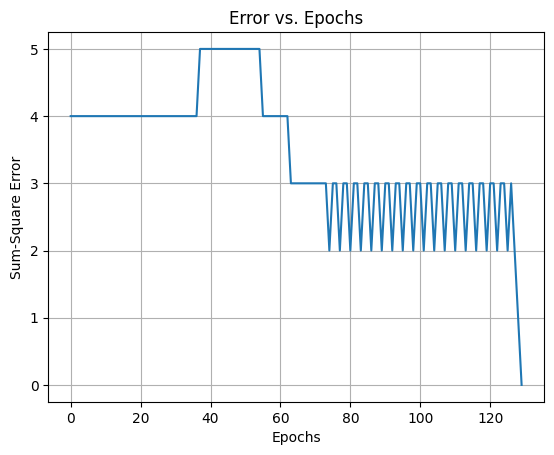

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_weighted_sum(input_vector, weights):
    """
    Calculates the weighted sum of inputs.
    """
    return input_vector[0] * weights[0] + input_vector[1] * weights[1] + input_vector[2] * weights[2]

def step_activation_function(weighted_sum):
    """
    Step activation function.
    """
    return 1 if weighted_sum >= 0 else 0

def train_perceptron(inputs, outputs, weights_O1, weights_O2, alpha, max_iterations, convergence_threshold):
    """
    Trains a perceptron model with two output nodes.
    """
    epoch = 0
    errorlist = []
    while epoch < max_iterations:
        total_error = 0
        for i in range(len(inputs)):
            # Calculate the weighted sum for O1 and O2
            weighted_sum_O1 = calculate_weighted_sum(inputs[i], weights_O1)
            weighted_sum_O2 = calculate_weighted_sum(inputs[i], weights_O2)

            # Apply the activation function
            predicted_output_O1 = step_activation_function(weighted_sum_O1)
            predicted_output_O2 = step_activation_function(weighted_sum_O2)

            # Calculate the error for O1 and O2
            error_O1 = outputs[i][0] - predicted_output_O1
            error_O2 = outputs[i][1] - predicted_output_O2
            total_error += error_O1**2 + error_O2**2

            # Update the weights for O1
            weights_O1[0] += alpha * error_O1 * inputs[i][0]
            weights_O1[1] += alpha * error_O1 * inputs[i][1]
            weights_O1[2] += alpha * error_O1 * inputs[i][2]

            # Update the weights for O2
            weights_O2[0] += alpha * error_O2 * inputs[i][0]
            weights_O2[1] += alpha * error_O2 * inputs[i][1]
            weights_O2[2] += alpha * error_O2 * inputs[i][2]

        # Store total error for this epoch
        errorlist.append(total_error)

        # Check for convergence
        if total_error <= convergence_threshold:
            break
        epoch += 1

    return weights_O1, weights_O2, epoch, errorlist

def plot(errors):
    """
    Plots the sum of squared errors over epochs.
    """
    plt.plot(range(len(errors)), errors)
    plt.title('Error vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid(True)
    plt.show()

def main():
    # Initial weights as lists for two output nodes
    weights_O1 = [10, 0.2, -0.75]
    weights_O2 = [10, 0.2, -0.75]

    # Learning rate
    alpha = 0.05
    # Threshold for convergence
    convergence_threshold = 0.002
    # Maximum number of iterations
    max_iterations = 1000

    # AND gate input-output pairs with bias term as first input
    inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
    # AND gate output mapping to two output nodes
    outputs = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])

    # Train the perceptron
    final_weights_O1, final_weights_O2, num_epochs, errors = train_perceptron(inputs, outputs, weights_O1, weights_O2, alpha, max_iterations, convergence_threshold)

    # Print the final weights, number of epochs, and plot errors
    print(f"FINAL WEIGHTS for O1: {final_weights_O1}")
    print(f"FINAL WEIGHTS for O2: {final_weights_O2}")
    print(f"No. of EPOCHS TO CONVERGE: {num_epochs}")
    plot(errors)

if __name__ == "__main__":
    main()


In [ ]:
#QUESTION A11
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# training and evaluating an MLP for a given gate
def train_and_evaluate_mlp(inputs, outputs, hidden_layer_sizes):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=2000, random_state=42, learning_rate_init=0.01)
    mlp.fit(inputs, outputs)
    predictions = mlp.predict(inputs)
    accuracy = accuracy_score(outputs, predictions)
    return predictions, accuracy
# AND Gate Inputs and Outputs
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_outputs = np.array([0, 0, 0, 1])

# XOR Gate Inputs and Outputs
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([0, 1, 1, 0])

# Scaling the inputs
scaler = StandardScaler()
scaled_and_inputs = scaler.fit_transform(and_inputs)
scaled_xor_inputs = scaler.fit_transform(xor_inputs)

# Training and evaluating MLP for AND Gate (No hidden layers)
and_predictions, and_accuracy = train_and_evaluate_mlp(scaled_and_inputs, and_outputs, hidden_layer_sizes=())
print(f"AND Gate Predictions: {and_predictions}")
print(f"AND Gate Accuracy: {and_accuracy * 100:.2f}%\n")

# Training and evaluating MLP for XOR Gate (One hidden layer with 2 neurons)
xor_predictions, xor_accuracy = train_and_evaluate_mlp(scaled_xor_inputs, xor_outputs, hidden_layer_sizes=(2,))
print(f"XOR Gate Predictions: {xor_predictions}")
print(f"XOR Gate Accuracy: {xor_accuracy * 100:.2f}%")


AND Gate Predictions: [0 0 0 1]
AND Gate Accuracy: 100.00%

XOR Gate Predictions: [1 1 1 1]
XOR Gate Accuracy: 50.00%


In [ ]:
#QUESTION A12
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from google.colab import drive
drive.mount('/content/drive')
sentence_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MLLAB3.xlsx')

# TF-IDF Vectorization for Text
tfidf_vectorizer = TfidfVectorizer()
text_features = tfidf_vectorizer.fit_transform(sentence_data['Text'])

# Selecting and scaling the other numerical features
numerical_features = sentence_data[['No_of_words', 'No_of_questoning_words', 'Has_Question_Mark']]
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Combining TF-IDF features with other numerical features
X = hstack([text_features, scaled_numerical_features])
y = sentence_data['label']

# Spliting the Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

#Evaluating the Model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Outputs Results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Mounted at /content/drive
Accuracy: 97.75%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.98      0.98      0.98        88

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178

